##Importing the required libraries


In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)

import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import nltk
nltk.download('all')

##Uploading the .csv files

In [ ]:
filenames_list = []
for i in range(14):
  if i<9:
    name = f"/content/Jan0{i+1}.csv"
  else:
    name = f"/content/Jan{i+1}.csv"
  filenames_list.append(name)
print(filenames_list)

In [ ]:
data = []
for i in range(14):
  name = f"df{i+1}"
  df = pd.read_csv(filenames_list[i])
  data.append(df)


In [ ]:
df = pd.concat(data)
df

In [ ]:
df = df.rename({'Processed_Text': 'Text'}, axis='columns')
df.drop(columns="Unnamed: 0", inplace=True)

##Extracting text from the data frame and appending to a list

In [ ]:
text_list = []
for i in range(len(df)):
  text_list.append(df['Text'].values[i])
text_list

In [ ]:
flat_list = []
flat_list1 = []
for i in text_list:
  for j in i:
    flat_list1.append(j)
flat_list = "".join(flat_list1)
flat_list

##Data Cleansing for the entire corpus of text

In [ ]:
for m in range(len(df)):
  
  #Removing all non-letters and non-digits
  df['Text'].values[m] = (re.sub(r"\W", " ", df['Text'].values[m]))
  

  #Removing all extra white spaces
  df['Text'].values[m] = " ".join(df['Text'].values[m].split())


In [ ]:
df['Text']

In [ ]:
# Function to perform Tokenizing 
def tokenizing(Text):
  split = re.split('\W+', Text)
  return split

In [ ]:
df['Text']=df['Text'].apply(lambda x: tokenizing(x.lower()))

In [ ]:
text_list = []
for j in range(len(df)):
  for i in df['Text'].values[j]:
    text_list.append(i)
len(text_list)

##Frequency distribution Graph for the most frequently occuring words 

In [ ]:
import nltk
#from nltk.corpus import webtext
from nltk.probability import FreqDist


data_analysis = nltk.FreqDist(text_list)
  
  # Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
  
  #for key in sorted(filter_words):
  #    print("%s: %s" % (key, filter_words[key]))
  
data_analysis = nltk.FreqDist(filter_words)
data_analysis.plot(25, cumulative=False)

In [ ]:
#We see words like 'said', 'city', etc. which would not add much value to the model.

In [ ]:
def listToString(s): 
    str1 = " " 
    return (str1.join(s))
for m in range(len(df)):
 df['Text'].values[m] = listToString(df['Text'].values[m])
df

##Removal of Stopwords and those obtained from the Frequency Distribution Graph

In [ ]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |= {"the", "jul", "pm", "https", "www", "printable", "version", "thehindu", "com", "news", "ece", 
               "s", "t", "d", "m", "article", "b", "rb","cwe", "click", "subscribe", "photo", "credit", "said", "topvpn",
               "right", "caused", "said", "people", "city", "official", "said", "also", "state",
               "would", "january", "time", "take", "first","year","centre",
               "leader", "person", "month", "crore", "held","including","kochicall","kochiexplained" ,
               "dept","edappally" ,"decongest","kalamassery","make_hub"}
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
for m in range(len(df)):
  text =df['Text'].values[m]
    #"nlp" Object is used to create documents with linguistic annotations.
  my_doc = nlp(text)

  # Create list of word tokens
  token_list = []
  for token in my_doc:
    token_list.append(token.text)

  # Create list of word tokens after removing stopwords
  filtered_sentence =[] 

  for word in token_list:
   lexeme = nlp.vocab[word]
   if lexeme.is_stop == False:
        filtered_sentence.append(word) 
  r = filtered_sentence
  df['Text'].values[m] = r

In [ ]:
text_list = []
for j in range(len(df)):
  for i in df['Text'].values[j]:
    text_list.append(i)
len(text_list)

In [ ]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist


data_analysis = nltk.FreqDist(text_list)
  
  # Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
  
  #for key in sorted(filter_words):
  #    print("%s: %s" % (key, filter_words[key]))
  
data_analysis = nltk.FreqDist(filter_words)
data_analysis.plot(25, cumulative=False)

##Removal of words less than 3 letters long

In [ ]:
for j in range(len(df)):
  add_list = []
  for i in df['Text'].values[j]:
    if len(i)>3:
      add_list.append(i)
  df['Text'].values[j] = add_list

In [ ]:
text_list = []
for j in range(len(df)):
  for i in df['Text'].values[j]:
    text_list.append(i)
len(text_list)

##Lemmatiztion

In [ ]:
from nltk.stem import WordNetLemmatizer  
lemmatizer = WordNetLemmatizer()

for m in range(len(df)):
  temp1 = []
  temp2 = df['Text'].values[m]
  for i in temp2:
    temp1.append(lemmatizer.lemmatize(i))
  df['Text'].values[m] = temp1 
df.head(len(df))

##Train-Test Split

In [ ]:
import sklearn
train, test = sklearn.model_selection.train_test_split(df, test_size=0.10, random_state=42 )

In [ ]:
print("Train Feature set:\t"+str(len(train)))
print("Train Feature set:\t"+str(len(test)))

In [ ]:
train

In [ ]:
data_lemmatized=train['Text'].tolist()
#data_lemmatized=listToString(data_lemmatized)
data_lemmatized

In [ ]:
flatlist=[]
for i in data_lemmatized:
  for k in i:
    flatlist.append(k)
flatlist

##Finding the Optimal Number of Topics for the LDA Model

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                                num_topics=num_topics, 
                                                id2word=dictionary,
                                                alpha = 0.5, 
                                           # eta = 1.6, 
                                            passes=20, 
                                            random_state=10, 
                                            chunksize = 150,
                                            iterations=50)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
#Creating dictionary
id2word = corpora.Dictionary(data_lemmatized)
#Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=10, 
                                                        limit=30, 
                                                        step=2)

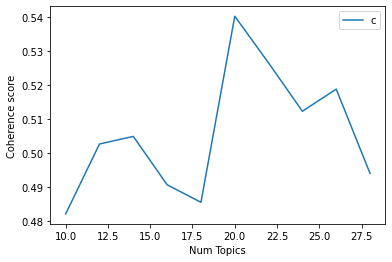

In [ ]:
# Show graph
limit=30; start=10; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

##Hyperparameter Tuning

In [43]:
def compute_coherence_values(dictionary, corpus, a):
    
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                                num_topics=20, 
                                                id2word=dictionary,
                                                alpha = 0.5, 
                                            #eta = 1.6, 
                                            passes=b, 
                                            random_state=20, 
                                            chunksize = a,
                                            iterations=c)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        return  coherencemodel.get_coherence()

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 11
max_topics = 35
step_size = 3
topics_range = range(min_topics, max_topics, step_size)

passes=[40,50,60]
chunksize = [10, 75,125]
iterations = [200,300,400]
#alpha=[0.5, 0.7]
#numtopics=[12,15,18,20,21,22,23,24,25]
# Validation sets
num_of_docs = len(corpus)

model_results = {#'Validation_Set': [],
                 'ChunkSize': [],
                 'Passes': [],
                 'Iterations': [],
                 'Coherence': [],
                 #'Alpha': []
                #'Num_Topics':[]
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm()
count=0   
    # iterate through validation corpuses
    #for i in range(len(corpus_sets)):
        # iterate through number of topics
for a in chunksize:
            # iterate through alpha values
    for b in passes:
                # iterare through beta values
       for c in iterations:
                    count+=1
                    print(count)
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus, dictionary=id2word, a=a)
                                                
                    # Save the model results
                    #model_results['Validation_Set'].append(corpus_title[i])
                    #model_results['Topics'].append(k)
                    model_results['ChunkSize'].append(a)
                    model_results['Passes'].append(b)
                    model_results['Iterations'].append(c)
                    #model_results['Num_Topics'].append(a)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    
pbar.close()

In [ ]:
df_param = pd.DataFrame(model_results)
df_param.head(27)

##Building the LDA Model

In [84]:

lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                                            id2word=id2word, 
                                            num_topics=20, 
                                            chunksize = 100, 
                                            passes=50,
                                            alpha = 0.5, 
                                            eta = 1.7, 
                                            workers=2, 
                                            random_state=500,
                                            iterations=50,
                                            per_word_topics = True
                                            )

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.001*"uppal" + 0.001*"compensation_revanthpfc" + 0.001*"dutiesthree_rural" + 0.001*"drone_applications" + 0.001*"districts_overtake" + 0.001*"damage_pay" + 0.001*"critical_partswater" + 0.001*"cong_mla" + 0.001*"cheating_octogenarian" + 0.001*"cisf_heldsccl"
Topic: 1 
Words: 0.001*"song" + 0.001*"film" + 0.001*"kuwy" + 0.001*"novel" + 0.000*"movie" + 0.000*"parambarai" + 0.000*"netflix" + 0.000*"review" + 0.000*"prime" + 0.000*"volkswagen"
Topic: 2 
Words: 0.001*"spotlight" + 0.001*"thermal_power" + 0.001*"ghatam" + 0.001*"car_accident" + 0.001*"children_recovering" + 0.001*"printingthe_unit" + 0.001*"courtshining" + 0.001*"corporation_launches" + 0.001*"closet_shower" + 0.001*"crime_gangs"
Topic: 3 
Words: 0.000*"depart" + 0.000*"memu" + 0.000*"yesvanthpur" + 0.000*"demu" + 0.000*"yesvathpur" + 0.000*"mysuruksr" + 0.000*"chikbanavar" + 0.000*"soldevanahalli" + 0.000*"loco" + 0.000*"bengalurumysuru"
Topic: 4 
Words: 0.000*"depart" + 0.000*"memu" + 0.000*"yesvanthpur" 

In [85]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.7884278977615579


##Visualization using Word Clouds and Inter Topic Distance Map

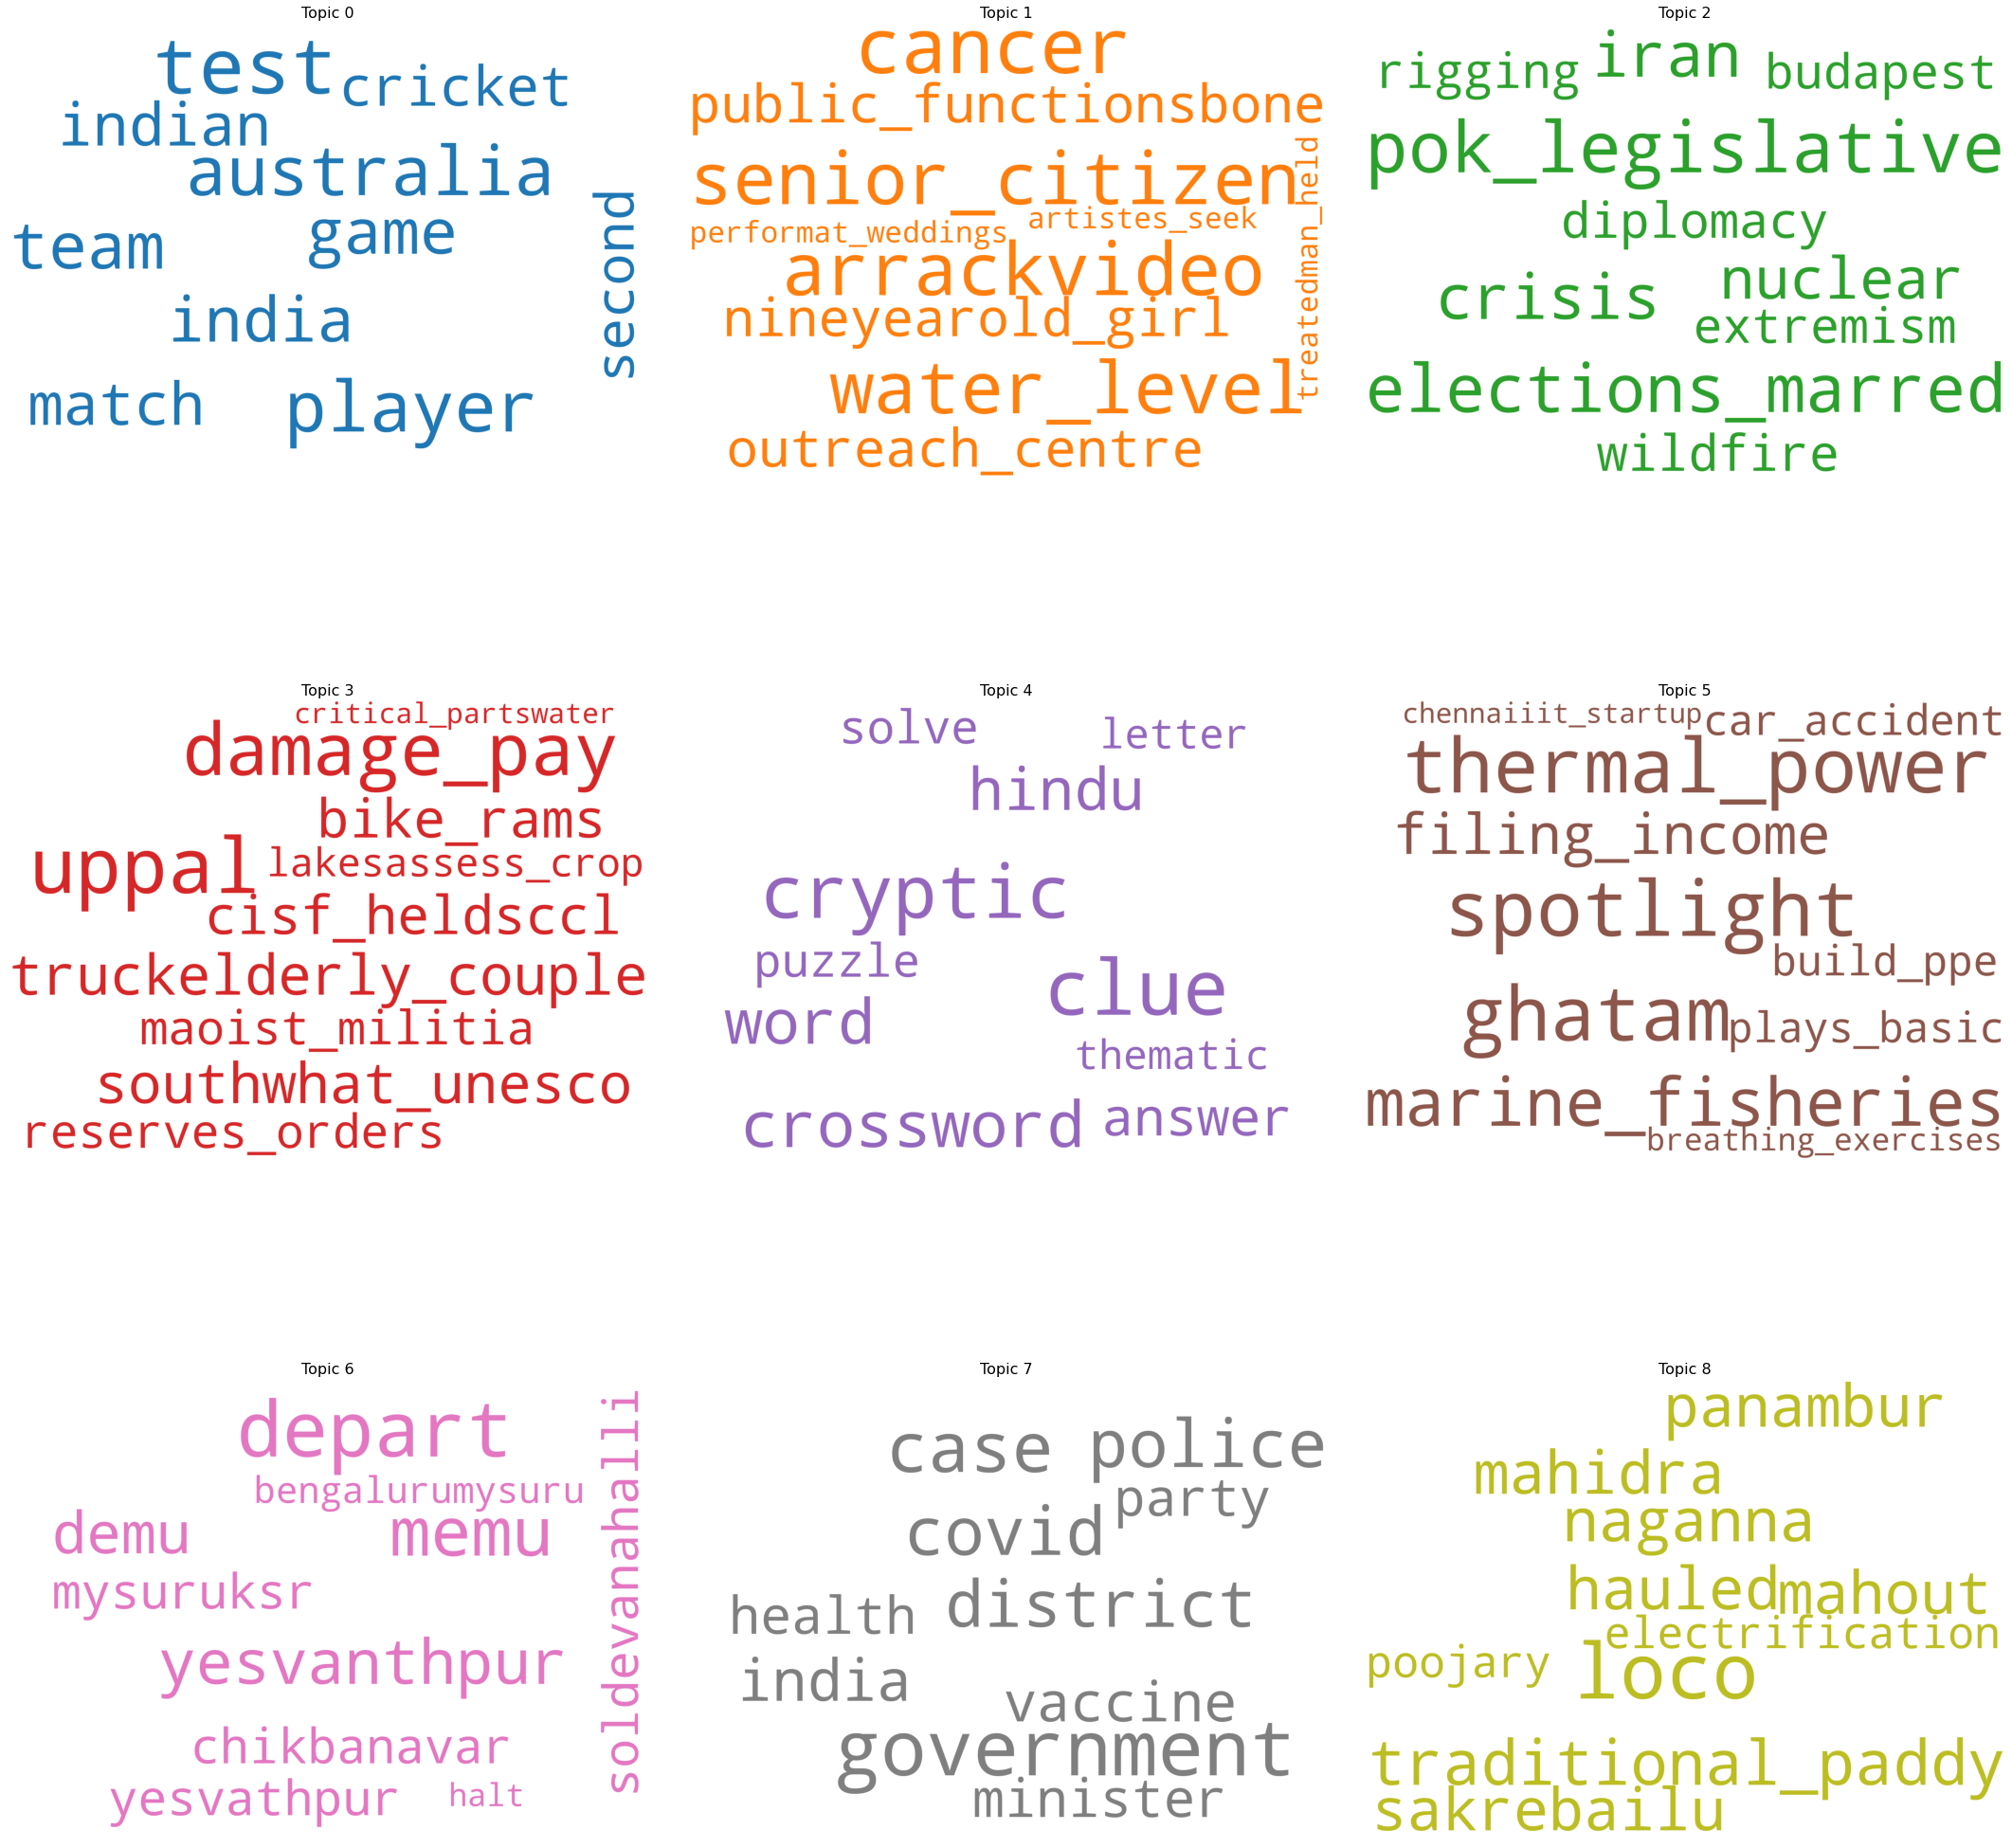

In [80]:
#Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

# Assigning different colors to each word cloud
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

# Drawing the word cloud 
Word_cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  contour_color='steelblue',
                  color_func=lambda *args, **kwargs: cols[i])

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(30,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    Word_cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(Word_cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=30, hspace=30)
plt.axis('off')
plt.margins(x=20, y=20)
plt.tight_layout()
plt.show()

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

In [81]:
test_list=test['Text'].to_list()

In [82]:
dist_list = []
count=0
for i in test_list:
  count+=1
  text = i
  dist_list.append(lda_model[id2word.doc2bow(text)])
  print("Document# ", count)
  print(lda_model[id2word.doc2bow(text)])
  print()

Document#  1
([(13, 0.9270279)], [(22, [13]), (49, [13]), (118, [13]), (160, [13]), (166, [13]), (248, [13]), (249, [13]), (455, [13]), (496, [13]), (543, [13]), (567, [13]), (622, [13]), (675, [13]), (737, [13]), (859, [13]), (886, [13]), (906, [13]), (911, [13]), (943, [13]), (976, [13]), (1030, [13]), (1038, [13]), (1169, [13]), (1238, [13]), (1606, [13]), (1786, [13]), (1824, [13]), (1950, [13]), (2187, [13]), (2224, [13]), (2246, [13]), (2251, [13]), (2263, [13]), (2372, [13]), (2436, [13]), (2699, [13]), (2726, [13]), (3701, [13]), (4066, [13]), (4140, [13]), (4149, [13]), (4569, [13]), (4899, [13]), (5188, [13]), (5562, [13]), (5598, [13]), (6424, [13]), (6734, [13, 12]), (7678, [13]), (8361, [13]), (8586, [13]), (8959, [13]), (9863, [13]), (10099, [13]), (10556, [13]), (12057, [13]), (18593, [13]), (18683, [13]), (18686, [13]), (18687, [13]), (21116, [13]), (24677, [13]), (27822, [13]), (30252, [13, 0]), (30866, [13]), (31165, [13]), (31166, [13]), (31167, [13, 3, 8, 18, 4, 19,

In [83]:
df = pd.DataFrame(zip(test['File_Name'], test['Text'], dist_list),
               columns =['File_Name', 'Tokenized_Text', 'Topic_Distribution'])
df.head(20)

,File_Name,Tokenized_Text,Topic_Distribution
0,thehindu_jan_8_file_235.json,"[pact, open, access, manuguru, solar, power, a...","([(13, 0.92703193)], [(22, [13]), (49, [13]), ..."
1,thehindu_jan_1_file_388.json,"[stamp, duty, rise, revenue, waiver, generated...","([(13, 0.9081816)], [(3, [13]), (23, [13]), (2..."
2,thehindu_jan_5_file_74.json,"[stable, cardiologist, devi, meet, team, treat...","([(6, 0.08465823), (13, 0.8427748)], [(22, [13..."
3,thehindu_jan_6_file_24.json,"[china, escalates, hong_kong, crackdown, arres...","([(13, 0.9136075)], [(19, [13]), (23, [13]), (..."
4,thehindu_jan_12_file_198.json,"[erravalli, village, wear, deserted, lookover,...","([(13, 0.6252975), (17, 0.3246967)], [(0, [13,..."
5,thehindu_jan_1_file_245.json,"[release, grant, avinashilingam, deemed, unive...","([(13, 0.90503025)], [(18, [13]), (31, [13]), ..."
6,thehindu_jan_4_file_117.json,"[foundation_stone, laid, wednesday, anubhava, ...","([(13, 0.9104569), (17, 0.013834069)], [(10, [..."
7,thehindu_jan_4_file_204.json,"[congress, seek, direction, speaker, mlas, pet...","([(13, 0.94164056)], [(11, [13]), (46, [13]), ..."
8,thehindu_jan_8_file_213.json,"[consultation, meeting, school, reopening, con...","([(13, 0.9068617)], [(19, [13]), (27, [13]), (..."
9,thehindu_jan_14_file_22.json,"[breathed, cleaner, bhogipm, microgramcubic_me...","([(2, 0.31922883), (13, 0.64261407)], [(7, [13..."
